In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from torch import nn

In [2]:
X, Y = make_blobs(n_samples=1000,
    n_features=2,
    centers=2
   
)

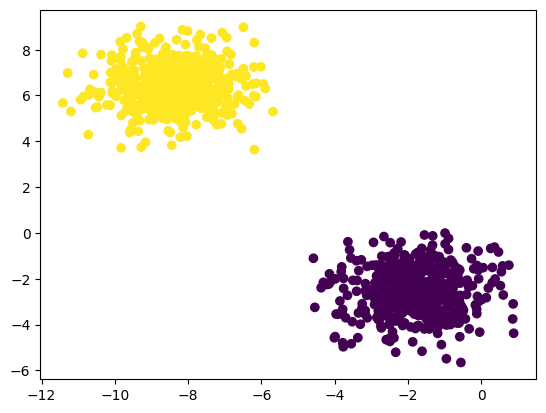

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [4]:
Y= Y.reshape(Y.shape[0],1)

In [5]:
X=torch.tensor(X, dtype=torch.float32)
Y=torch.tensor(Y, dtype= torch.float32)

In [6]:
class CLASSIFICATIONModel(nn.Module):
    def __init__(self):
       
        super().__init__()
        
        self.layer1= nn.Linear(2,10)
        self.activation1= nn.Sigmoid()
            
        self.layer2=nn.Linear(10,2)

        self.layer3= nn.Linear(2,1)
        self.activation3 = nn.Sigmoid()    
    def forward(self, x):
        x= self.layer1(x)
        x= self.activation1(x)
        x= self.layer2(x)
        x=self.layer3(x)
        x= self.activation3(x)
        return x

In [7]:
model= CLASSIFICATIONModel()

In [8]:
define_criterion = torch.nn.BCELoss()

SGD_optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [9]:
for epoch in range(500): 

  
    predict_y = model(X) 
    loss = define_criterion(predict_y, Y) 

  
     
    loss.backward() 

    SGD_optimizer.step() 
    SGD_optimizer.zero_grad()
    print('epoch {}, loss function {}'.format(epoch, loss.item()))

epoch 0, loss function 0.6901463866233826
epoch 1, loss function 0.6888154745101929
epoch 2, loss function 0.687448263168335
epoch 3, loss function 0.686034619808197
epoch 4, loss function 0.6845642328262329
epoch 5, loss function 0.6830264329910278
epoch 6, loss function 0.6814103126525879
epoch 7, loss function 0.6797045469284058
epoch 8, loss function 0.6778973340988159
epoch 9, loss function 0.6759763956069946
epoch 10, loss function 0.6739287972450256
epoch 11, loss function 0.6717411279678345
epoch 12, loss function 0.6693993210792542
epoch 13, loss function 0.6668885350227356
epoch 14, loss function 0.664193332195282
epoch 15, loss function 0.6612975597381592
epoch 16, loss function 0.6581841111183167
epoch 17, loss function 0.6548354625701904
epoch 18, loss function 0.6512329578399658
epoch 19, loss function 0.6473576426506042
epoch 20, loss function 0.6431899070739746
epoch 21, loss function 0.6387091279029846
epoch 22, loss function 0.633894681930542
epoch 23, loss function 0

In [10]:
with torch.inference_mode():
    predictionsModel=model(X)

In [11]:
predictionsModel=predictionsModel >=0.5

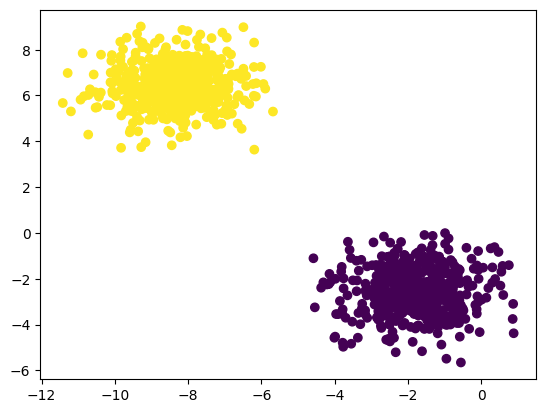

In [12]:
plt.scatter(X[:,0], X[:,1], c=predictionsModel)